Funding by Category:
category_code
advertising          918619012
analytics            276415182
automotive            52000000
biotech             1723699484
cleantech           1300284730
consulting            58050000
ecommerce            329081922
education             43263835
enterprise          1338882096
fashion              133570000
finance              193178704
games_video          844643530
hardware             773938873
health                66330000
hospitality            3750000
manufacturing          4662000
medical              166334616
messaging             59053000
mobile              7263750881
music                 99725019
network_hosting      735033389
news                  95380000
other                345309233
photo_video          108286415
public_relations     277066000
real_estate            7347782
search               156300000
security             373428570
semiconductor       1105156970
social                44973498
software            2657598865
spor

C:\Users\HP\AppData\Local\Temp\ipykernel_21280\283859243.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_by_category.index, y=funding_by_category.values, palette='viridis')


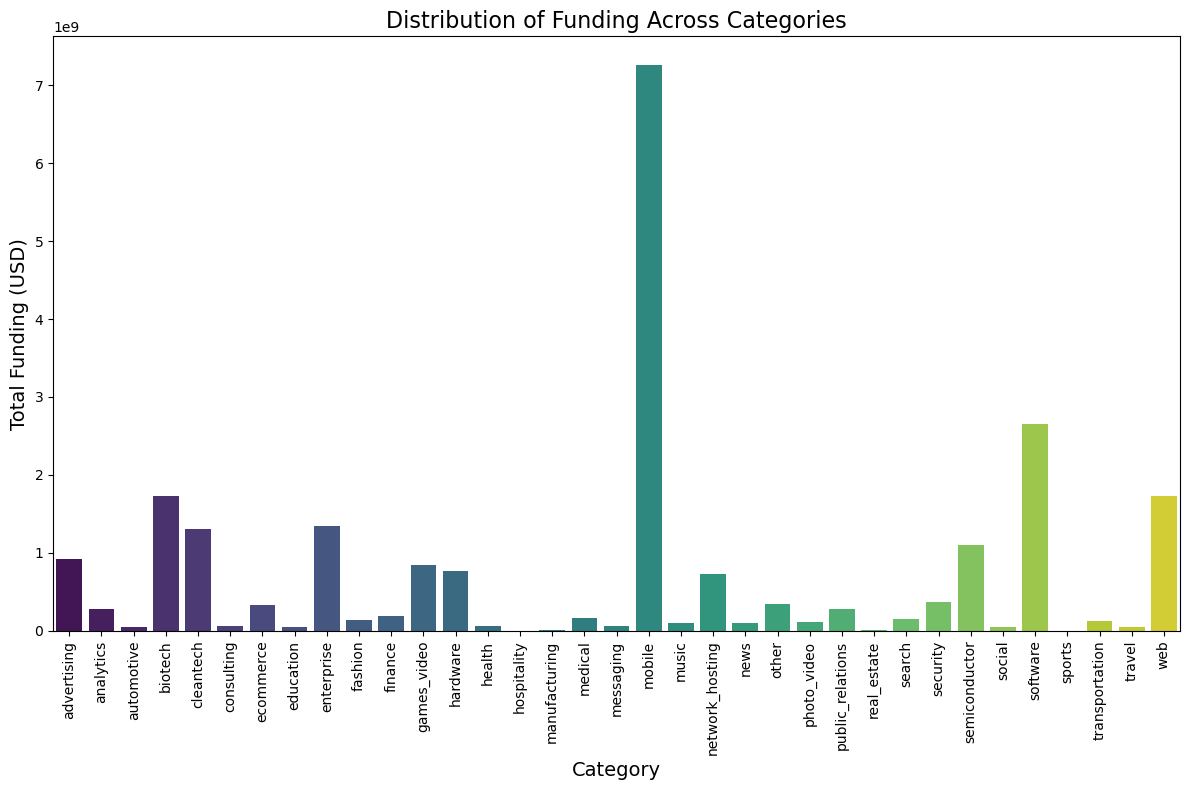

C:\Users\HP\AppData\Local\Temp\ipykernel_21280\283859243.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=successful_companies.index, y=successful_companies.values, palette='magma')


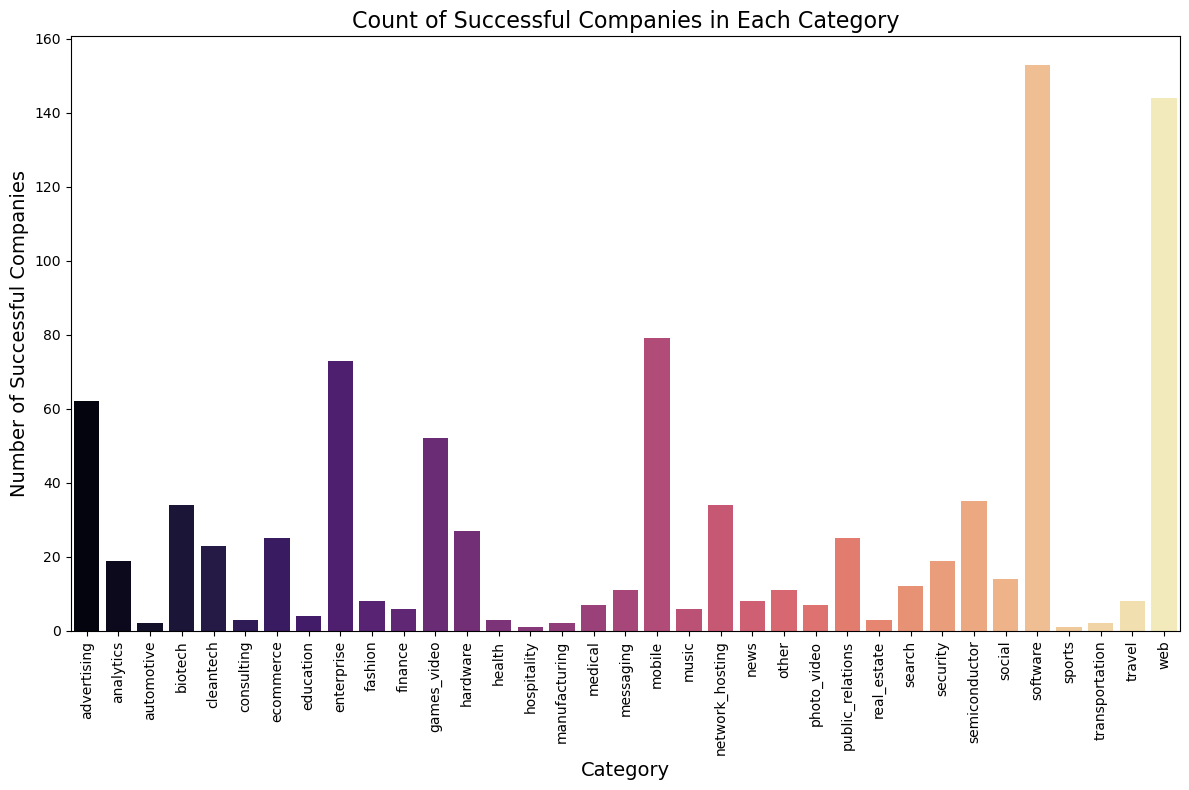

Success rate by category:
category_code
advertising         1.0
search              1.0
network_hosting     1.0
news                1.0
other               1.0
photo_video         1.0
public_relations    1.0
real_estate         1.0
security            1.0
mobile              1.0
semiconductor       1.0
social              1.0
software            1.0
sports              1.0
transportation      1.0
travel              1.0
music               1.0
messaging           1.0
analytics           1.0
enterprise          1.0
automotive          1.0
biotech             1.0
cleantech           1.0
consulting          1.0
ecommerce           1.0
education           1.0
fashion             1.0
medical             1.0
finance             1.0
games_video         1.0
hardware            1.0
health              1.0
hospitality         1.0
manufacturing       1.0
web                 1.0
dtype: float64


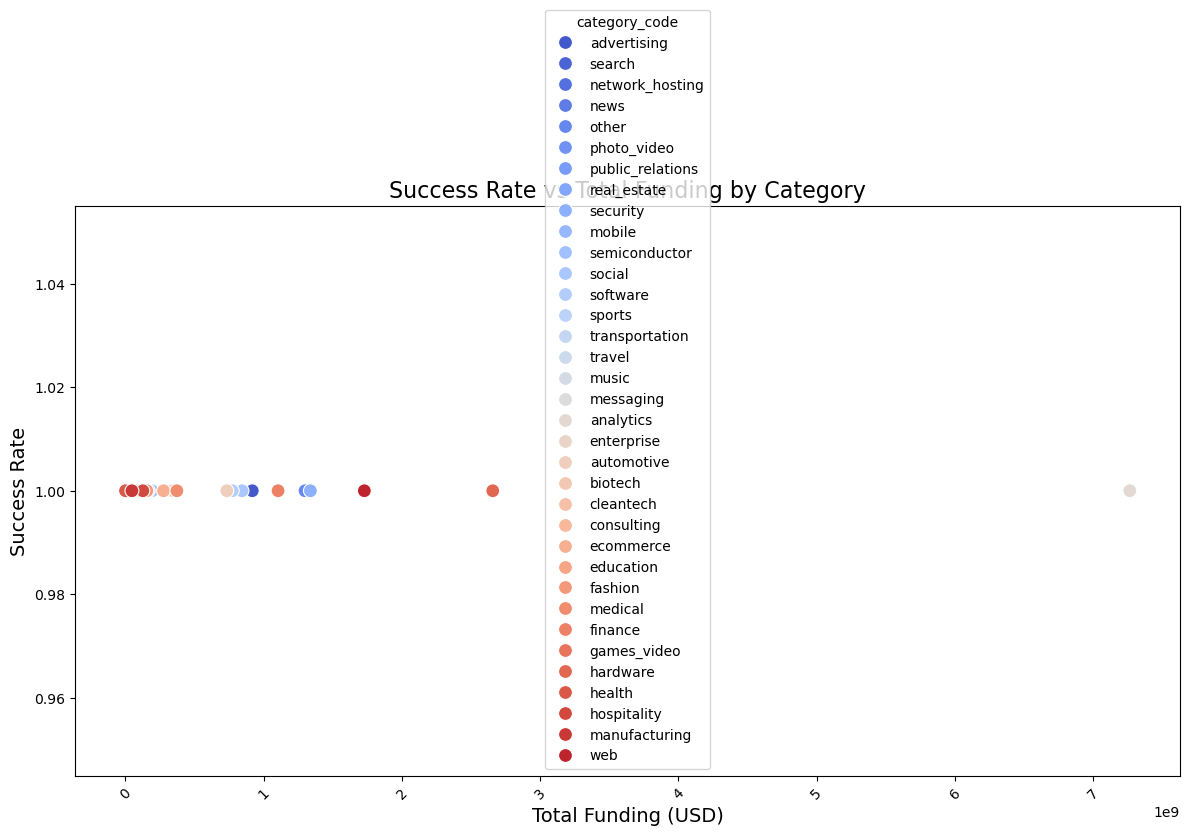

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# قراءة البيانات من ملف CSV
df = pd.read_csv(r'C:\Users\HP\Desktop\Hack\startup data.csv')

# التعامل مع القيم المفقودة
df.drop(columns=['Unnamed: 6'], inplace=True)
df['closed_at'] = df['closed_at'].fillna('Active')
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)
df['state_code.1'] = df['state_code.1'].fillna('Unknown')

# تحويل الأعمدة الزمنية إلى نوع بيانات تاريخ
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')
df['closed_at'] = pd.to_datetime(df['closed_at'], format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

# حساب التمويل الكلي لكل فئة
funding_by_category = df.groupby('category_code')['funding_total_usd'].sum()
print("Funding by Category:")
print(funding_by_category)

# حساب عدد الشركات الناجحة في كل فئة
successful_companies = df[df['closed_at'].isna()].groupby('category_code').size()
print("Successful Companies by Category:")
print(successful_companies)

# توزيع التمويل بين الفئات
plt.figure(figsize=(12, 8))
sns.barplot(x=funding_by_category.index, y=funding_by_category.values, palette='viridis')
plt.title('Distribution of Funding Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Funding (USD)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# عدد الشركات الناجحة في كل فئة
plt.figure(figsize=(12, 8))
sns.barplot(x=successful_companies.index, y=successful_companies.values, palette='magma')
plt.title('Count of Successful Companies in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Successful Companies', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# حساب إجمالي عدد الشركات لكل فئة
total_companies_by_category = df.groupby('category_code').size()

# حساب نسبة النجاح لكل فئة
success_rate = successful_companies / total_companies_by_category

# عرض نسبة النجاح
success_rate = success_rate.sort_values(ascending=False)
print("Success rate by category:")
print(success_rate)


# رسم بياني يوضح العلاقة بين التمويل ونسبة النجاح
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=funding_by_category,
    y=success_rate,
    hue=success_rate.index,  # الفئات (categories) كمؤشر لتمييز الألوان
    palette='coolwarm',
    s=100
)
plt.title('Success Rate vs Total Funding by Category', fontsize=16)
plt.xlabel('Total Funding (USD)', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
